Two-Asset HANK model with Capital

**Table of contents**<a id='toc0_'></a>    
- 1. [Stationary equilibrium](#toc1_)    
  - 1.1. [Tests](#toc1_1_)    
  - 1.2. [Distributions](#toc1_2_)    
  - 1.3. [MPCs](#toc1_3_)    
- 2. [Compute Jacobians](#toc2_)    
- 3. [Fiscal policy shock](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

This notebook shows how to **solve a two-asset Heterogenous Agent New Keynessian (HANK) model** using the ``GEModelTools`` package.

The model is based on Auclert, Rognlie, Straub (2020), "Micro Jumps, Macro Humps: Monetary Policy and Business Cycles in an Estimated HANK Model" (NBER Working Paper 26647).

The code was originally developed by *Yannik Winkelmann*.

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from HANKCapitalModel import HANKCapitalModel
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

## 1. <a id='toc1_'></a>[Stationary equilibrium](#toc0_)

In [2]:
model = HANKCapitalModel(name='baseline')

In [3]:
par = model.par
ss = model.ss
path = model.path
sim = model.sim

In [4]:
model.info()

settings:
 par.py_hh = False
 par.py_block = True
 par.full_z_trans = False
 par.T = 400

households:
 grids_hh: [l,a]
 pols_hh: [l,a]
 inputs_hh: [Z,ra,rl]
 inputs_hh_z: []
 outputs_hh: [c,l,a,uce]
 intertemps_hh: [vbeg_l]

aggregate:
 shocks: [eg,em]
 unknowns: [r,w,rk,Y,Ip,Pi,Pi_w]
 targets: [fisher_res,w_res,clearing_Y,invest_res,NKPC_res,NKPC_w_res,clearing_K]

blocks (inputs -> outputs):
 production_firm: [w,rk,Y] -> [N,Kd,s]
 capital_firm: [r,rk,Ip] -> [Q,invest_res,I,K,psi,Div_k]
 price_setters: [s,Pi,Y] -> [NKPC_res,Div_int]
 mutual_fund: [Div_k,Div_int,r] -> [Div,q,p_eq,rl,ra]
 government: [eg,w,N,q] -> [G,tau,B]
 hh_income: [N,w,tau] -> [Z]
 hh: [Z,ra,rl] -> [C_hh,L_hh,A_hh,UCE_hh]
 union: [tau,w,UCE_hh,N,Pi_w] -> [NKPC_w_res]
 taylor: [em,Pi] -> [i]
 fisher: [Pi,i,r] -> [fisher_res]
 real_wage: [w,Pi_w,Pi] -> [w_res]
 market_clearing: [Y,L_hh,C_hh,G,I,psi,Kd,K,q,B,p_eq,A_hh] -> [qB,A,L,clearing_Y,clearing_K,clearing_A,clearing_L]


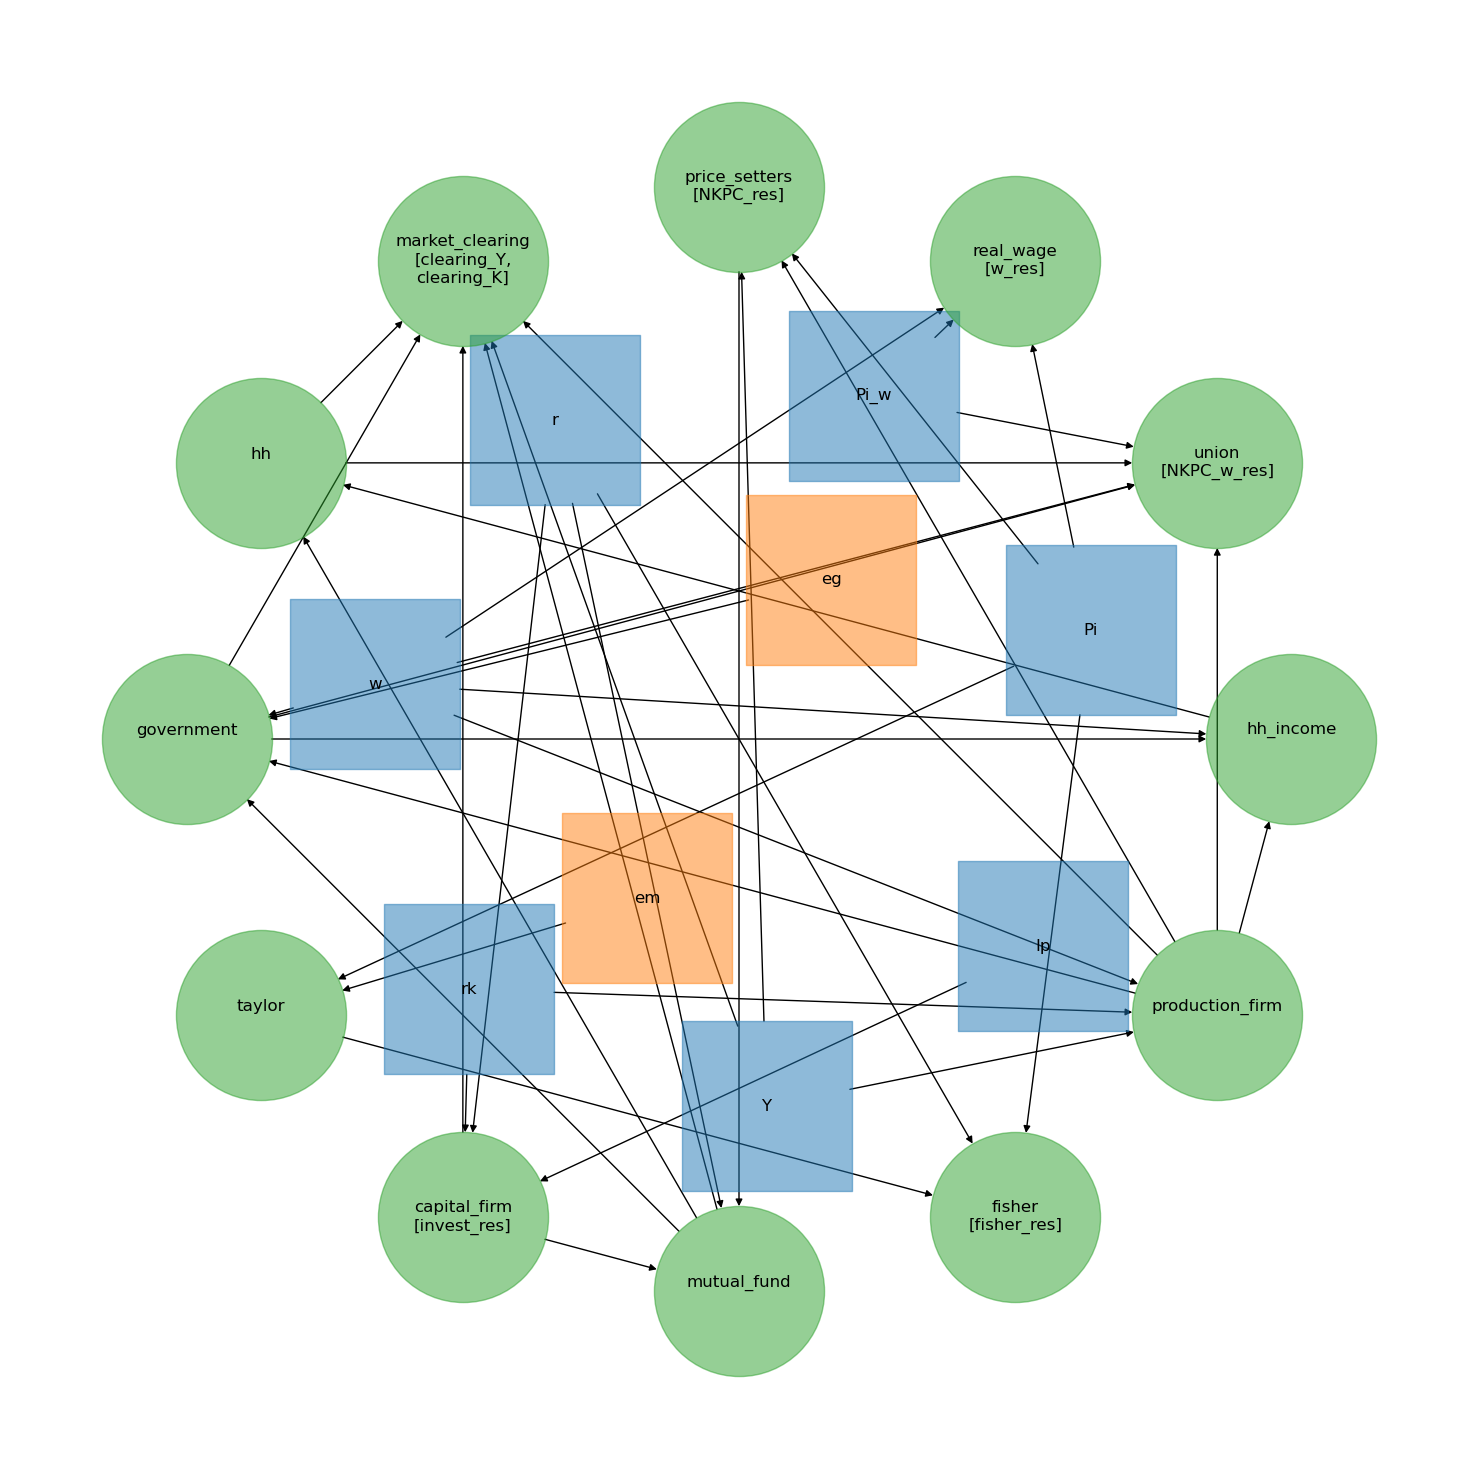

In [5]:
model.draw_DAG(figsize=(15,15),node_size=15000,order=['shocks','unknowns','blocks'])

In [6]:
model.find_ss(do_print=True)

find beta for market clearing
 beta =   0.995100000000 -> ss.clearing_Y =   0.000080492593 [30.1 secs]
 beta =   0.995100000000 -> ss.clearing_Y =   0.000080492593 [16.4 secs]
 beta =   0.995100000000 -> ss.clearing_Y =   0.000080492593 [16.8 secs]
 beta =   0.995100014828 -> ss.clearing_Y =   0.000080455442 [15.1 secs]
 beta =   0.995132126984 -> ss.clearing_Y =  -0.000000325477 [12.8 secs]
 beta =   0.995131997599 -> ss.clearing_Y =   0.000000001318 [11.6 secs]
 beta =   0.995131998121 -> ss.clearing_Y =   0.000000000000 [12.5 secs]
 beta =   0.995131998121 -> ss.clearing_Y =   0.000000000000 [11.0 secs]

final evaluation
 beta =   0.995131998121 -> ss.clearing_Y =   0.000000000000 [11.3 secs]

steady state found in 2.0 mins 18 secs
 beta   = 0.9951
 nu     = 0.6763

Discrepancy in Y =   0.00000000
Discrepancy in A =   0.00000000
Discrepancy in L =  -0.00000000


### 1.1. <a id='toc1_1_'></a>[Tests](#toc0_)

note: inputs = steady state value -> expected: constant value (straigt line)

household problem solved along transition path in 6.8 secs
household problem simulated along transition in 3.5 secs



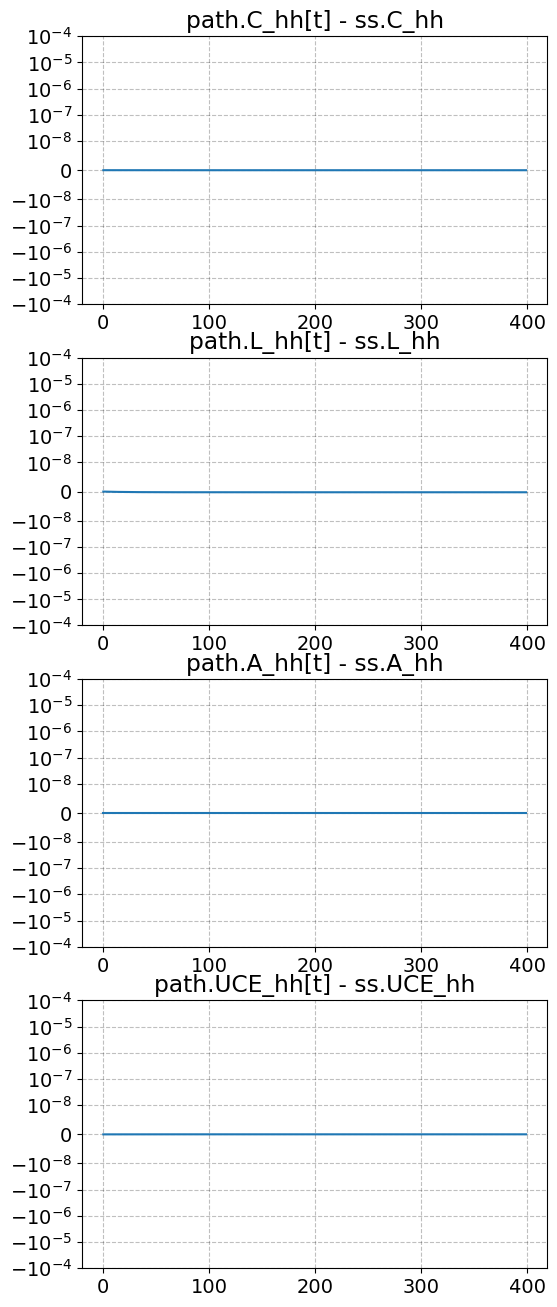

In [7]:
model.test_hh_path()

In [8]:
model.test_path()

shocks: eg em 
unknowns: r w rk Y Ip Pi Pi_w 

blocks.production_firm
 N                0.0e+00
 Kd               1.8e-15
 s                0.0e+00
blocks.capital_firm
 Q                0.0e+00
 invest_res       0.0e+00 [target]
 I                0.0e+00
 K                0.0e+00
 psi              0.0e+00
 Div_k            0.0e+00
blocks.price_setters
 NKPC_res         0.0e+00 [target]
 Div_int          0.0e+00
blocks.mutual_fund
 Div              2.8e-17
 q                0.0e+00
 p_eq             0.0e+00
 rl               0.0e+00
 ra               0.0e+00
blocks.government
 G                0.0e+00
 tau              0.0e+00
 B                0.0e+00
blocks.hh_income
 Z                0.0e+00
hh
 C_hh             1.0e-11
 L_hh             2.3e-10
 A_hh             2.0e-13
 UCE_hh           1.6e-11
blocks.union
 NKPC_w_res       4.1e-13 [target]
blocks.taylor
 i                0.0e+00
blocks.fisher
 fisher_res       0.0e+00 [target]
blocks.real_wage
 w_res            0.0e+00 [target]
b

### 1.2. <a id='toc1_2_'></a>[Distributions](#toc0_)

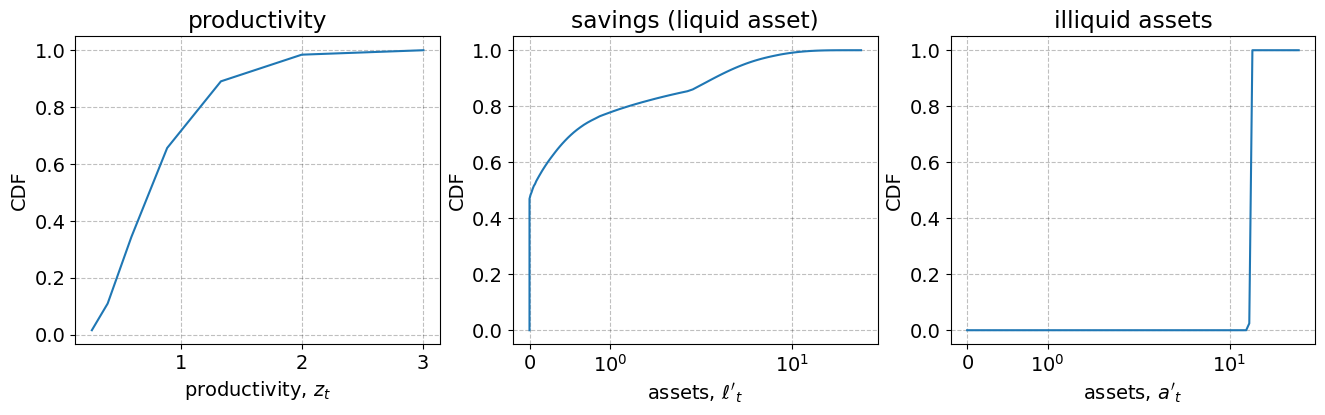

In [9]:
fig = plt.figure(figsize=(16,4),dpi=100)

# a. income
ax = fig.add_subplot(1,3,1)
ax.set_title('productivity')
ax.plot(par.z_grid,np.cumsum(np.sum(ss.D,axis=(0,2,3))))

ax.set_xlabel('productivity, $z_{t}$')
ax.set_ylabel('CDF')

# b. liquid assets
ax = fig.add_subplot(1,3,2)
ax.set_title('savings (liquid asset)')
ax.plot(np.insert(par.l_grid,0,par.l_grid[0]),np.insert(np.cumsum(np.sum(ss.D,axis=(0,1,3))),0,0.0),label='discrete')
ax.set_xlabel('assets, $\ell\'_{t}$')
ax.set_ylabel('CDF')
ax.set_xscale('symlog')

# c. illiquid assets
ax = fig.add_subplot(1,3,3)
ax.set_title('illiquid assets')
ax.plot(np.insert(par.a_grid,0,par.a_grid[0]),np.insert(np.cumsum(np.sum(ss.D,axis=(0,1,2))),0,0.0),label='discrete')
ax.set_xlabel('assets, $a\'_{t}$')
ax.set_ylabel('CDF')
ax.set_xscale('symlog')

### 1.3. <a id='toc1_3_'></a>[MPCs](#toc0_)

In [10]:
# for liquid assets
MPC = np.zeros(ss.D.shape)
dc = (ss.c[:, :, 1:, :] - ss.c[:, :, :-1, :])
l_grid_full = np.repeat(par.l_grid, par.Na).reshape(1,1,par.Nl,par.Na)
dl = (1 + ss.rl) * l_grid_full[:, :, 1:, :] - (1 + ss.rl) * l_grid_full[:, :, :-1, :]
MPC[:, :, :-1, :] = dc / dl
MPC[:, :, -1, :] = MPC[:, :, -2, :]  # assuming constant MPC at end
mean_MPC = np.sum(MPC * ss.D)
mean_MPC_ann = 1 - (1 - mean_MPC) ** 4
print(f'mean MPC: {mean_MPC:.3f} [annual: {mean_MPC_ann:.3f}]')

mean MPC: 0.354 [annual: 0.826]


In [11]:
# for illiquid assets
MPC = np.zeros(ss.D.shape)
dc = (ss.c[:, :, :, 1:] - ss.c[:, :, :, :-1])
a_grid_full = np.repeat(par.a_grid, par.Nl).reshape(1,1,par.Nl,par.Na).swapaxes(2,3)
da = (1 + ss.ra) * a_grid_full[:, :, :, 1:] - (1 + ss.ra) * a_grid_full[:, :, :, :-1]
MPC[:, :, :, :-1] = dc / da
MPC[:, :, :, -1] = MPC[:, :, :, -2]  # assuming constant MPC at end
mean_MPC = np.sum(MPC * ss.D)
# mean_MPC_ann = 1 - (1 - mean_MPC) ** 4
# print(f'mean MPC: {mean_MPC:.3f} [annual: {mean_MPC_ann:.3f}]')
print(f'mean MPC out of illiquid assets: {mean_MPC:.3f} (annual terms)')

mean MPC out of illiquid assets: 0.024 (annual terms)


## 2. <a id='toc2_'></a>[Compute Jacobians](#toc0_)

In [12]:
model.compute_jacs(do_print=True,dx=1e-5)

household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for Z               in 7.6 secs
curly_Y and curly_D calculated for ra              in 7.3 secs
curly_Y and curly_D calculated for rl              in 7.3 secs
curly_E calculated in 5.5 secs
builiding blocks combined in 3.0 secs
household Jacobian computed in 30.6 secs

full Jacobians:
full Jacobian to unknowns computed in 3.5 secs [in evaluate_blocks(): 1.0 secs]
full Jacobian to shocks computed in 1.8 secs [in evaluate_blocks(): 0.3 secs]


## 3. <a id='toc3_'></a>[Fiscal policy shock](#toc0_)

In [13]:
model.find_transition_path(shocks=['eg'],do_print=True,do_end_check=False)

finding the transition path:
 it =   0 -> max. abs. error = 1.07e-03
   0.00e+00 in fisher_res
   0.00e+00 in w_res
   1.07e-03 in clearing_Y
   0.00e+00 in invest_res
   0.00e+00 in NKPC_res
   2.42e-05 in NKPC_w_res
   1.78e-15 in clearing_K
 it =   1 -> max. abs. error = 2.09e-06
   2.74e-08 in fisher_res
   1.24e-08 in w_res
   3.19e-07 in clearing_Y
   2.09e-06 in invest_res
   9.72e-08 in NKPC_res
   3.22e-07 in NKPC_w_res
   6.49e-07 in clearing_K
 it =   2 -> max. abs. error = 3.28e-08
   2.04e-10 in fisher_res
   8.42e-11 in w_res
   2.54e-09 in clearing_Y
   1.50e-08 in invest_res
   4.56e-10 in NKPC_res
   2.23e-09 in NKPC_w_res
   3.28e-08 in clearing_K
 it =   3 -> max. abs. error = 6.96e-11
   2.50e-13 in fisher_res
   2.13e-13 in w_res
   6.87e-12 in clearing_Y
   5.21e-11 in invest_res
   6.62e-13 in NKPC_res
   5.36e-12 in NKPC_w_res
   6.96e-11 in clearing_K
 it =   4 -> max. abs. error = 4.94e-13
   2.89e-15 in fisher_res
   1.39e-15 in w_res
   4.24e-14 in clearing_

### shocks ###


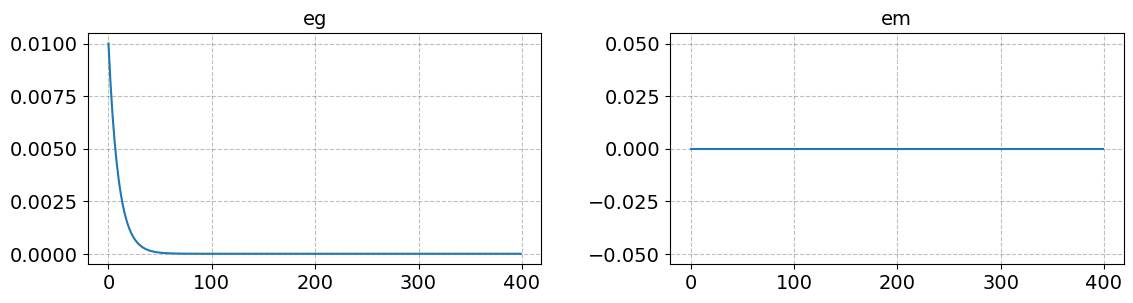


### varnames ###


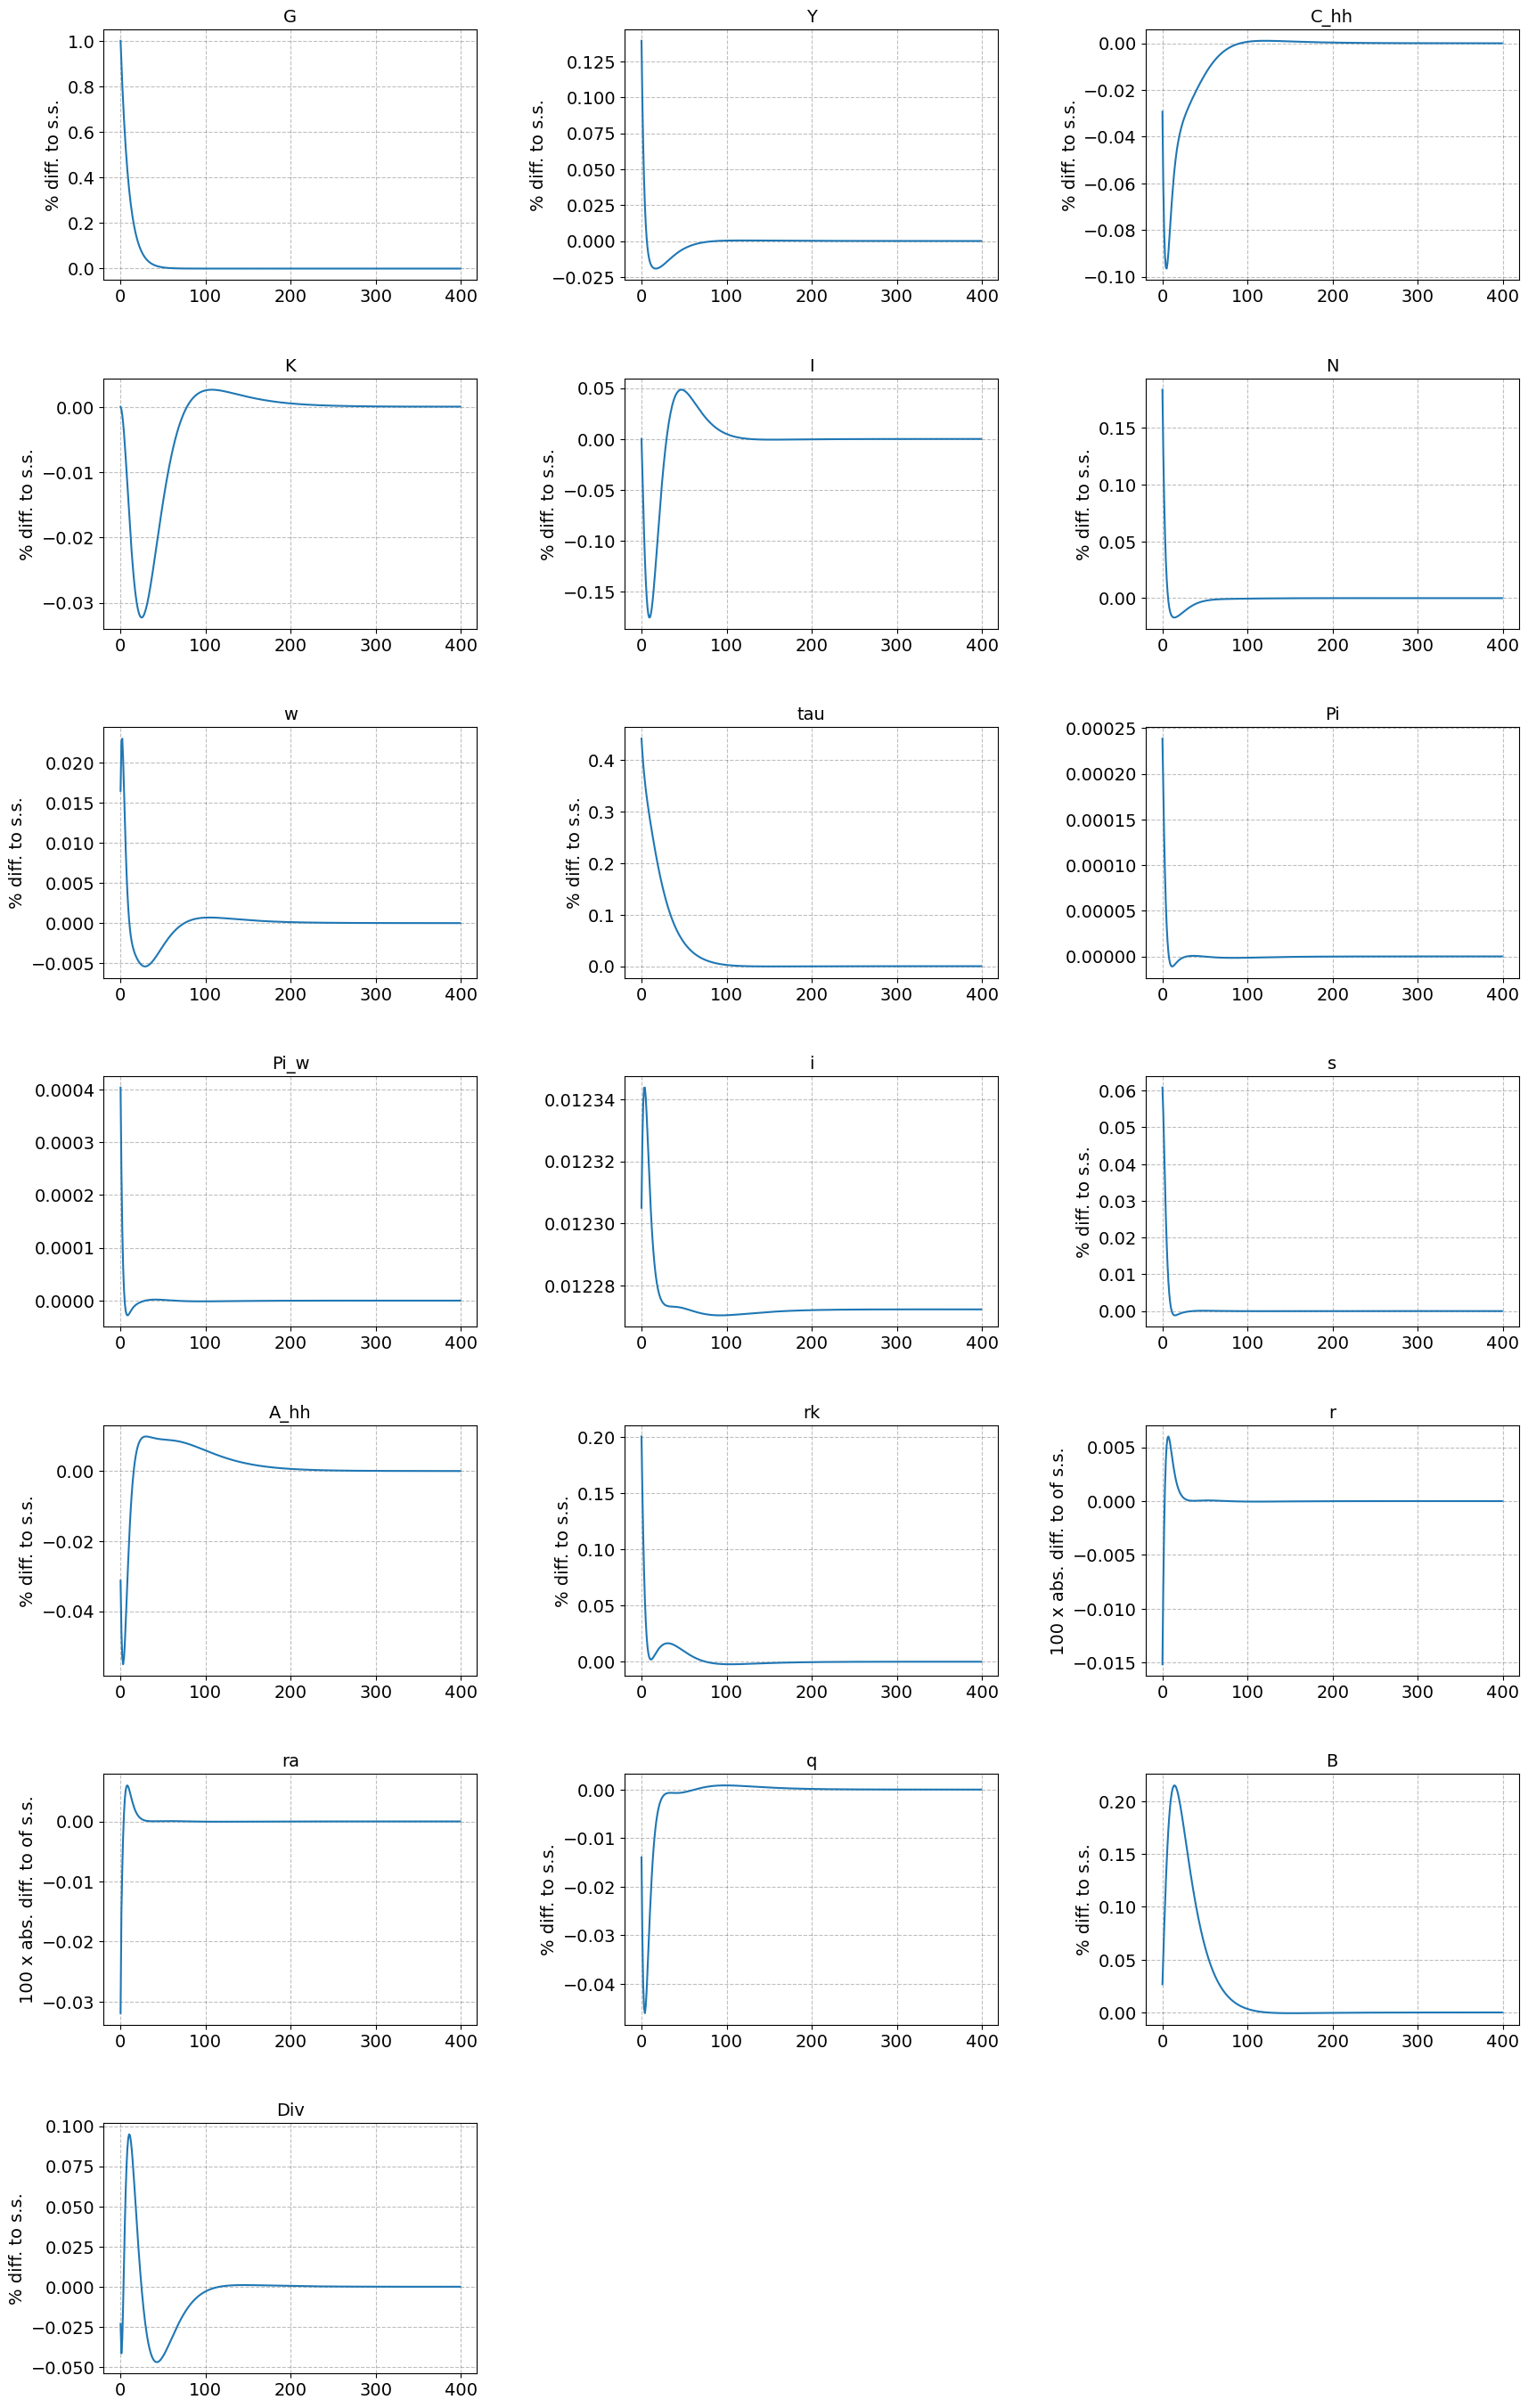


### tagets ###


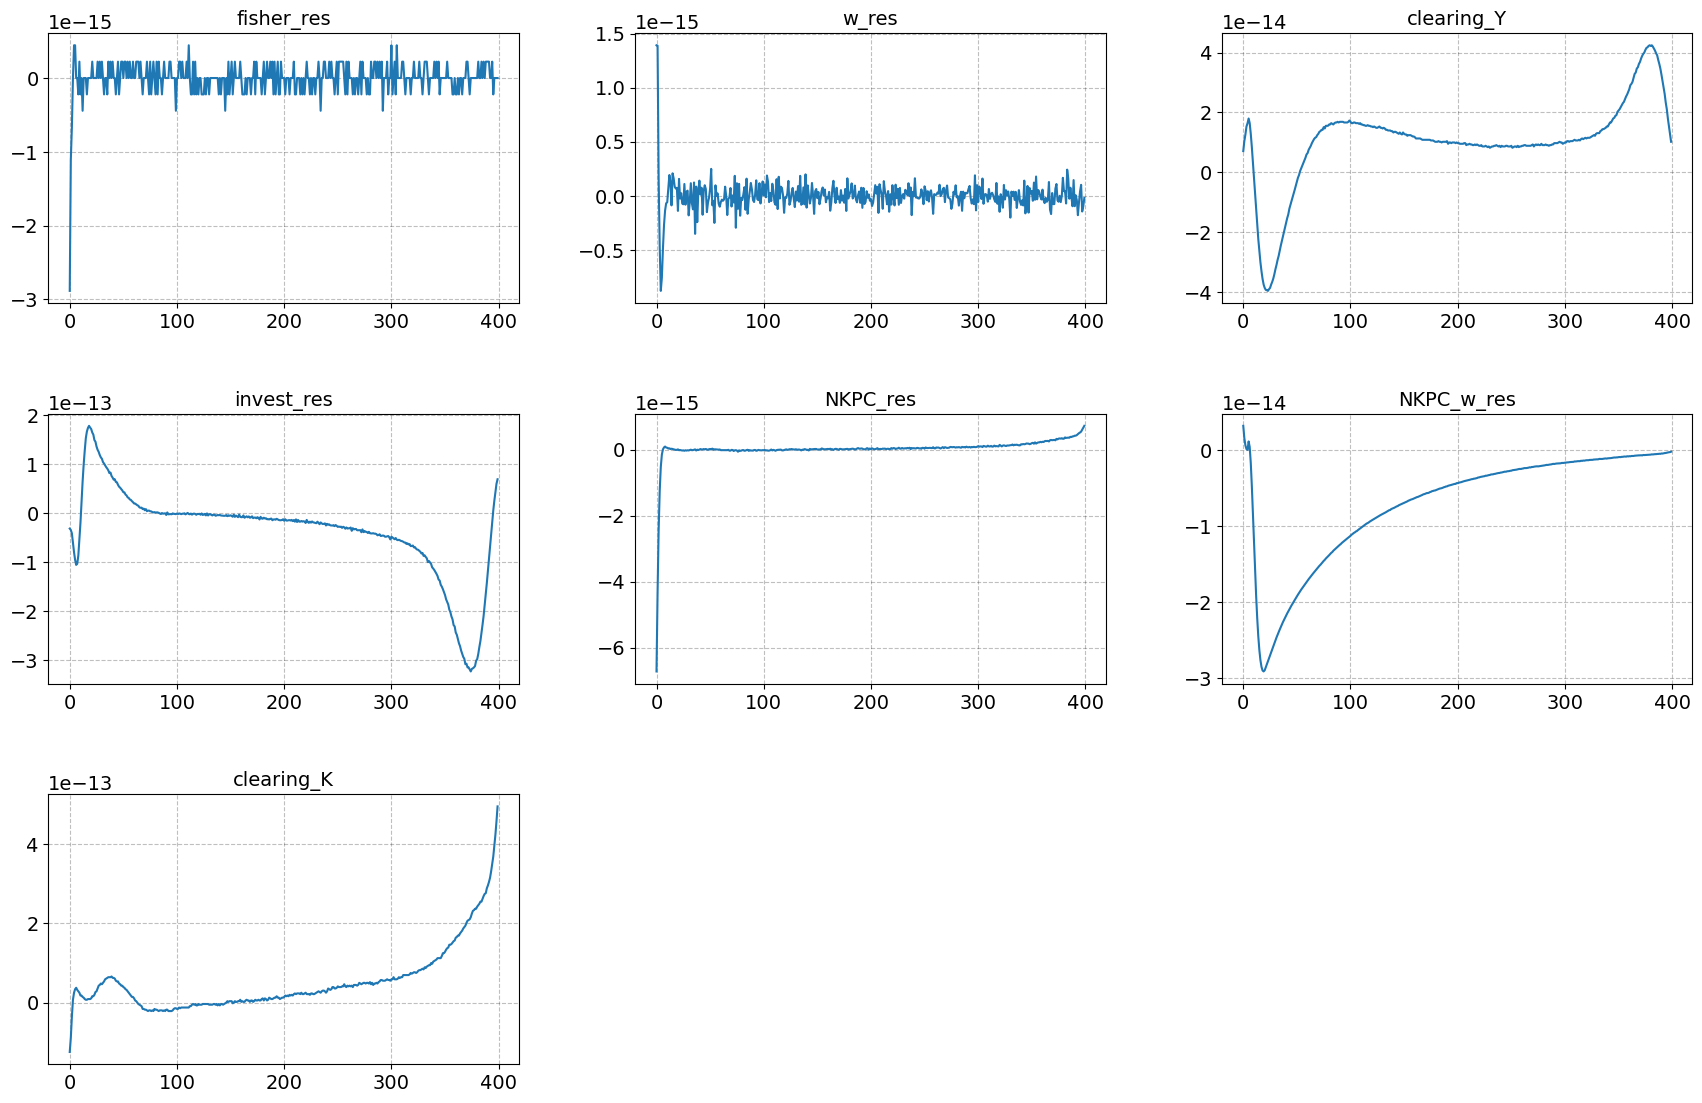

In [14]:
paths = ['G', 'Y', 'C_hh', 'K', 'I',
         'N', 'w', 'tau', 'Pi', 'Pi_w', 'i', 's',
         'A_hh',
         'rk', 'r','ra',
         'q', 'B',
         'Div']
paths_short = ['Y', 'C_hh', 'K', 'I', 'N', 'w']
lvl_value = ['eg', 'em', 'i', 'Pi', 'Pi_w']
abs_diff = ['r', 'ra', 'rl', 'i']
facs = {'r':100,'ra':100,'rl':100}
# model.show_IRFs(paths,abs_diff=abs_diff,facs=facs,ncols=3,T_max=100)
model.show_IRFs(paths, lvl_value=lvl_value, abs_diff=abs_diff, facs=facs,ncols=3, do_shocks=True)

linear transition path found in 0.6 secs [finding solution matrix: 0.6 secs]
### shocks ###


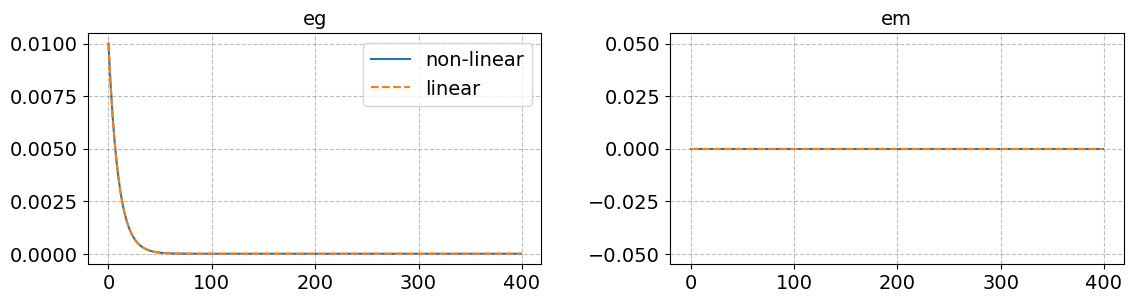


### varnames ###


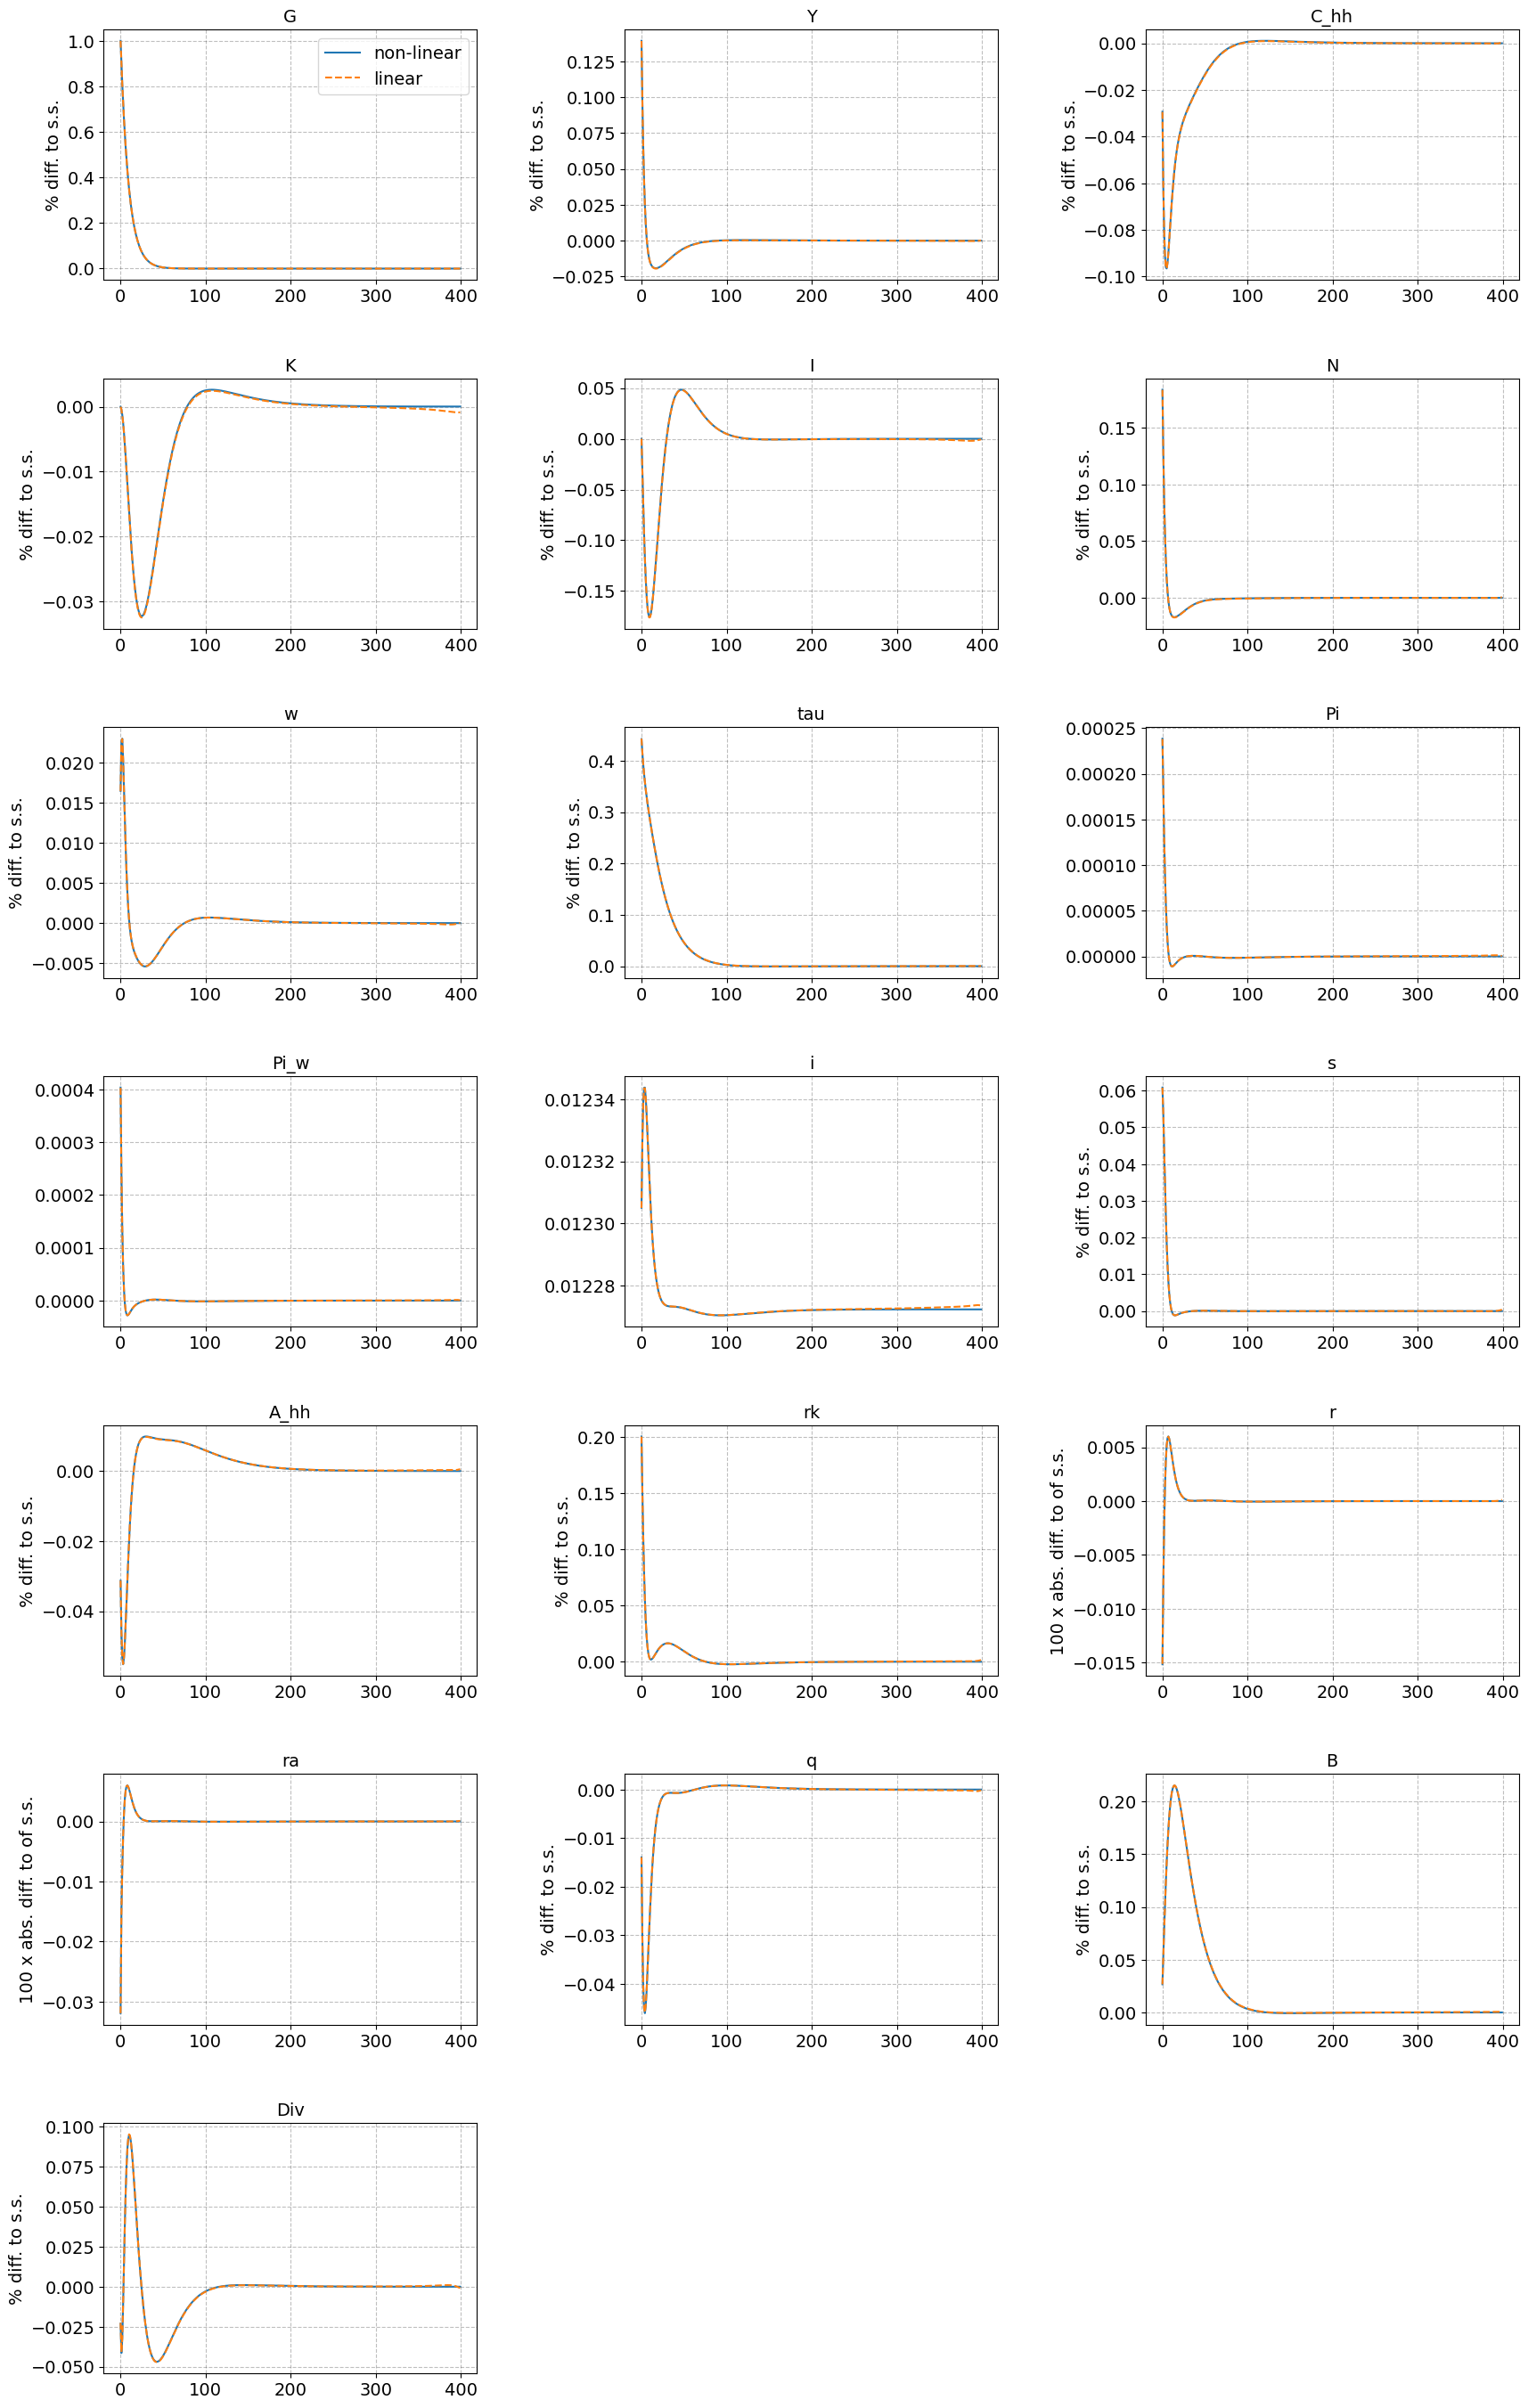


### tagets ###


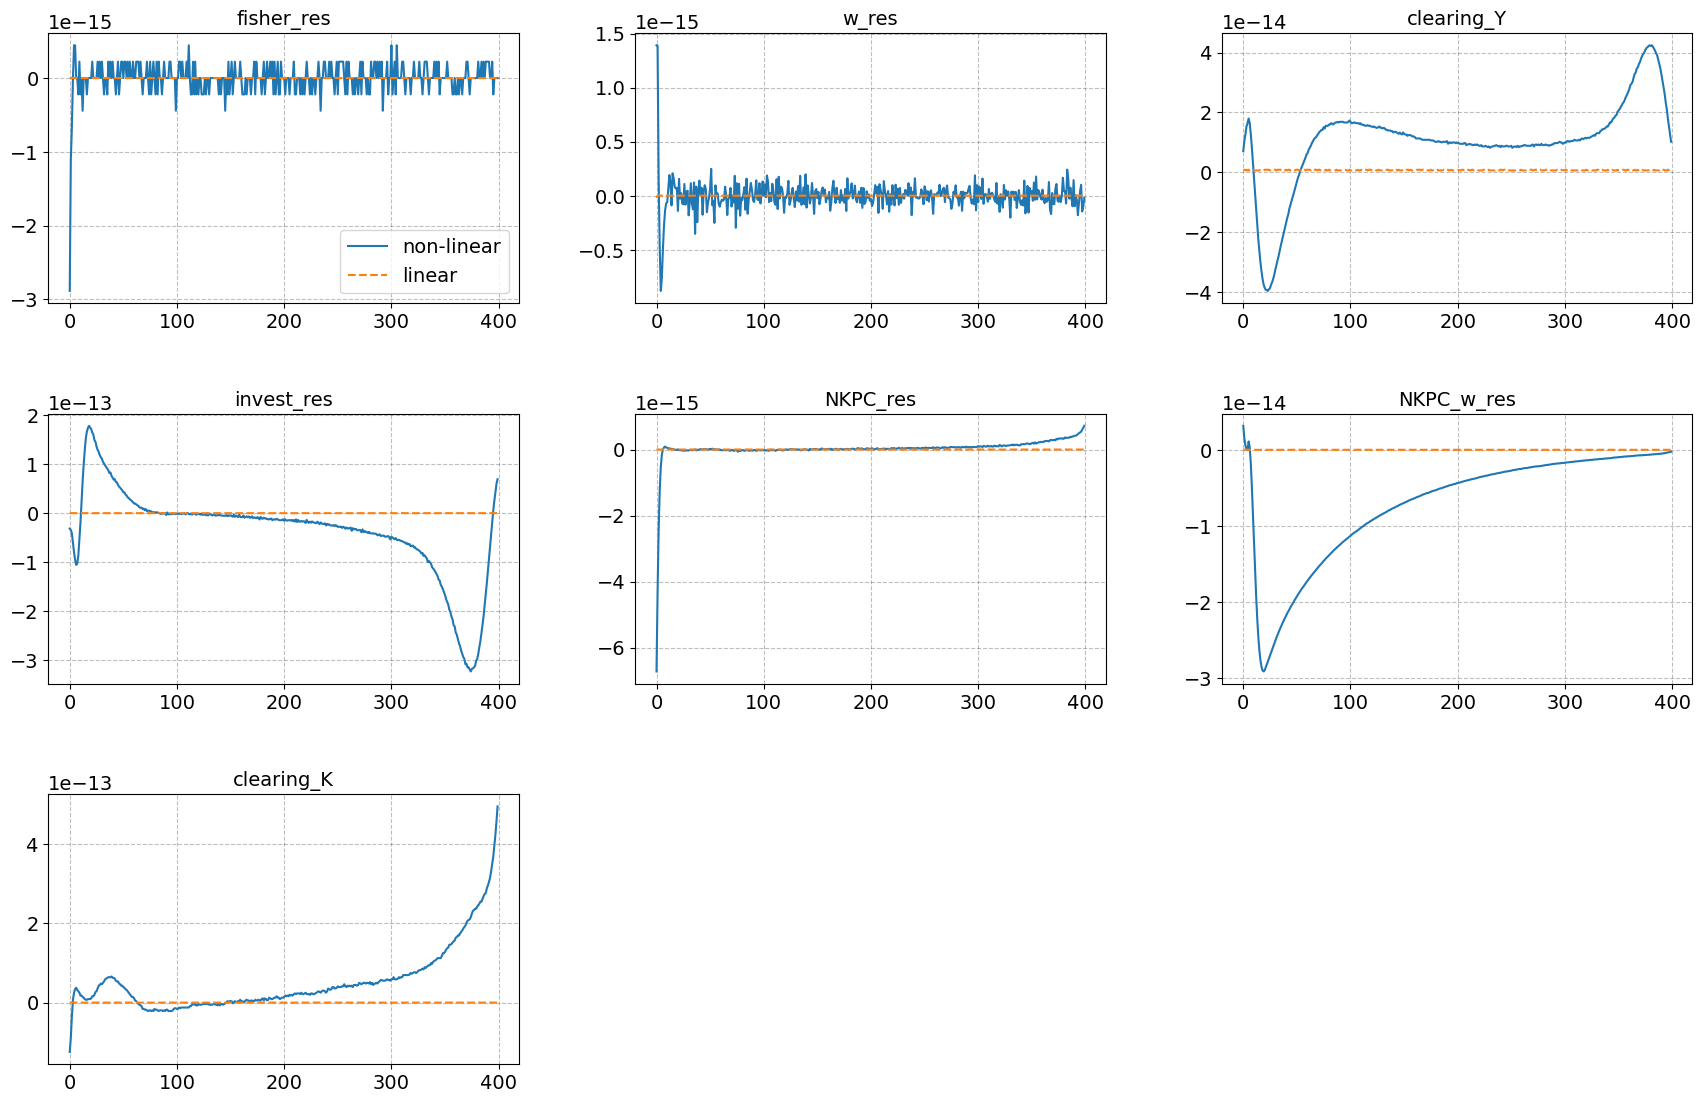

In [15]:
model.find_IRFs(shocks=['eg'],do_print=True)
model.show_IRFs(paths, lvl_value=lvl_value, abs_diff=abs_diff, facs=facs,ncols=3, do_shocks=True,do_linear=True)